In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly as py
import plotly.graph_objs as go

In [2]:
df=pd.read_csv('london_merged.csv')

In [4]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [10]:
df.columns=['timestamp','cnt','Real temperature','Feel temperature','hun','windspeed','weather_code','is_holiday','is_weekend','season']

In [11]:
# data:
# "timestamp" - timestamp field for grouping the data
# "cnt" - the count of a new bike shares
# "t1" - real temperature in C
# "t2" - temperature in C "feels like"
# "hum" - humidity in percentage
# "wind_speed" - wind speed in km/h
# "weather_code" - category of the weather
# "is_holiday" - boolean field - 1 holiday / 0 non holiday
# "is_weekend" - boolean field - 1 if the day is weekend
# "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

# "weathe_code" category description:
# 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
# 2 = scattered clouds / few clouds
# 3 = Broken clouds
# 4 = Cloudy
# 7 = Rain/ light Rain shower/ Light rain
# 10 = rain with thunderstorm
# 26 = snowfall
# 94 = Freezing Fog

In [12]:
df.info()
#no null values
#17414 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
timestamp           17414 non-null object
cnt                 17414 non-null int64
Real temperature    17414 non-null float64
Feel temperature    17414 non-null float64
hun                 17414 non-null float64
windspeed           17414 non-null float64
weather_code        17414 non-null float64
is_holiday          17414 non-null float64
is_weekend          17414 non-null float64
season              17414 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [15]:
df['timestamp'].head()

0    2015-01-04 00:00:00
1    2015-01-04 01:00:00
2    2015-01-04 02:00:00
3    2015-01-04 03:00:00
4    2015-01-04 04:00:00
Name: timestamp, dtype: object

In [16]:
df.describe()

,cnt,Real temperature,Feel temperature,hun,windspeed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [17]:
df.head(3)

,timestamp,cnt,Real temperature,Feel temperature,hun,windspeed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0


In [18]:
df['is_weekend'].value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

Text(0.5, 1.0, 'Countplot for weekend and count of bicycles')

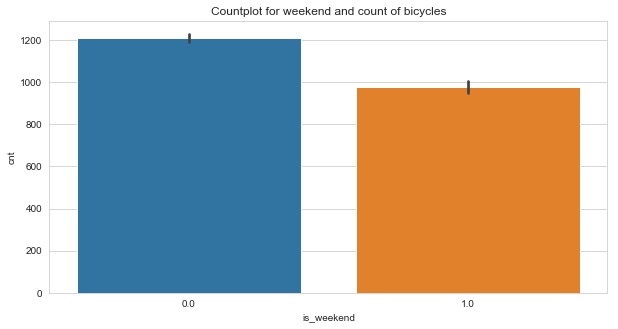

In [24]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.barplot(data=df,x='is_weekend',y='cnt')
plt.title('Countplot for weekend and count of bicycles')

##From the graph, it can be seen that the count of new bikes share is higher when is not a weekend day

In [25]:
df.head(2)

,timestamp,cnt,Real temperature,Feel temperature,hun,windspeed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0


In [26]:
df['season'].value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

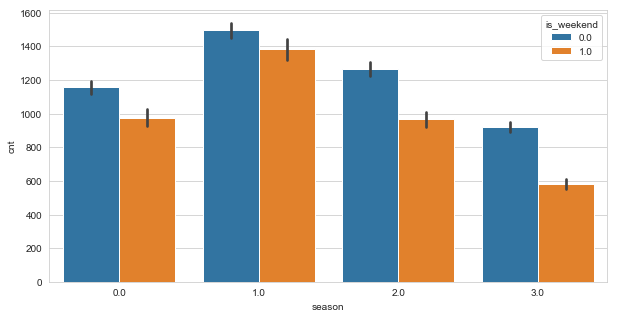

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='season',y='cnt',hue='is_weekend')

#From the graph, it can be seen that summer has the highest number of bicycle count

In [30]:
df.head(1)

,timestamp,cnt,Real temperature,Feel temperature,hun,windspeed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0


Text(0.5, 1.0, 'Holiday and the cont of new bike shares')

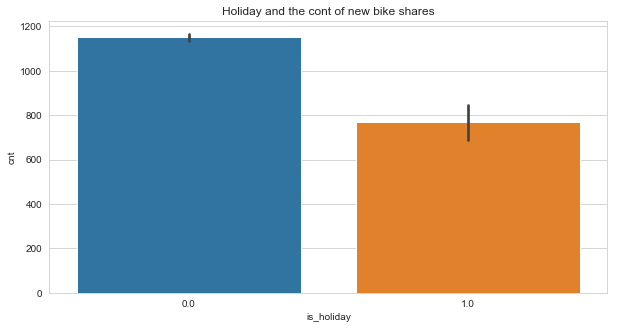

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='is_holiday',y='cnt')
plt.title('Holiday and the cont of new bike shares')

In [33]:
df.head()

,timestamp,cnt,Real temperature,Feel temperature,hun,windspeed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [44]:
df1=pd.DataFrame(df['cnt'].groupby(by=df['season']).sum())


Text(0.5, 1.0, 'CNT differentiated by different seasons')

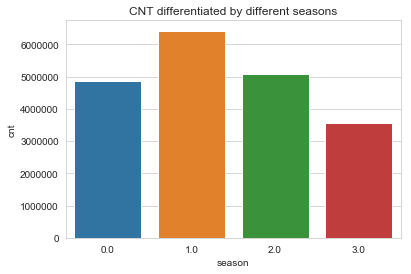

In [47]:
df1.reset_index(inplace=True)
sns.barplot(data=df1,x='season',y='cnt')
plt.title('CNT differentiated by different seasons')

In [48]:
df2=df['cnt'].groupby(by=df['weather_code']).sum()

In [51]:
df2=pd.DataFrame(df2)

In [52]:
df2

,cnt
weather_code,
1.0,7146847
2.0,6035580
3.0,4243887
4.0,929978
7.0,1526461
10.0,8168
26.0,15051


Text(0.5, 1.0, 'Relationship between different weather conditions and the number of cnt')

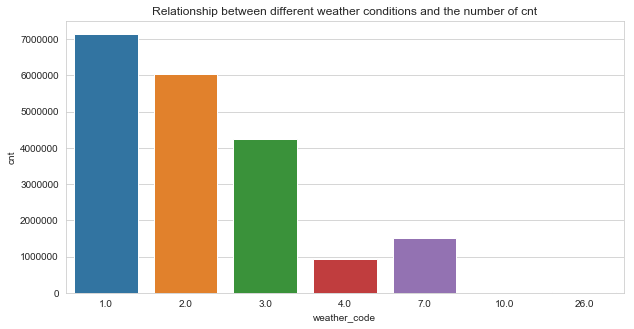

In [55]:
df2.reset_index(inplace=True)
plt.figure(figsize=(10,5))
sns.barplot(data=df2,x='weather_code',y='cnt')
plt.title('Relationship between different weather conditions and the number of cnt')

In [75]:
df['timestamp']=pd.to_datetime(df['timestamp'],format='%Y-%m-%d %H:%M:%S')

Text(0, 0.5, 'Real temperature')

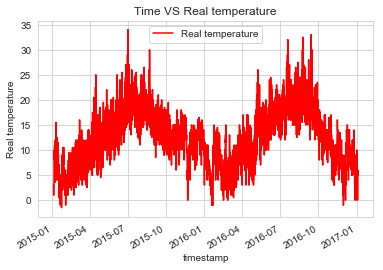

In [82]:
df.plot(x='timestamp',y='Real temperature',color='red')
plt.title('Time VS Real temperature')
plt.ylabel('Real temperature')

Text(0, 0.5, 'Feel temperature')

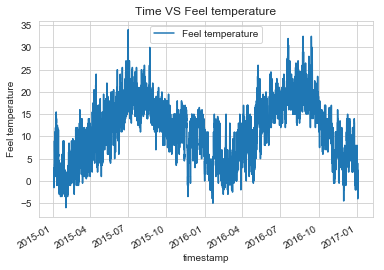

In [83]:
df.plot(x='timestamp',y='Feel temperature')
plt.title('Time VS Feel temperature')
plt.ylabel('Feel temperature')

Text(0, 0.5, 'cnt')

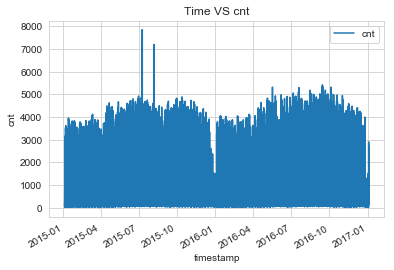

In [84]:
df.plot(x='timestamp',y='cnt')
plt.title('Time VS cnt')
plt.ylabel('cnt')

Text(0, 0.5, 'Humidity')

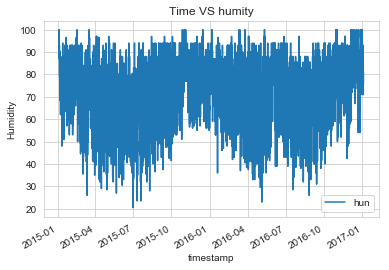

In [85]:
df.plot(x='timestamp',y='hun')
plt.title('Time VS humity')
plt.ylabel('Humidity')

Text(0, 0.5, 'Windspeed')

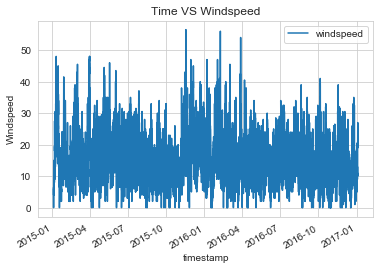

In [86]:
df.plot(x='timestamp',y='windspeed')
plt.title('Time VS Windspeed')
plt.ylabel('Windspeed')